In [13]:
# dipendenze

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# import dataset

CSV_PATH = "../sample_data/housing.csv"

df = pd.read_csv(CSV_PATH, index_col=0)

In [5]:
# correlation matrix

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


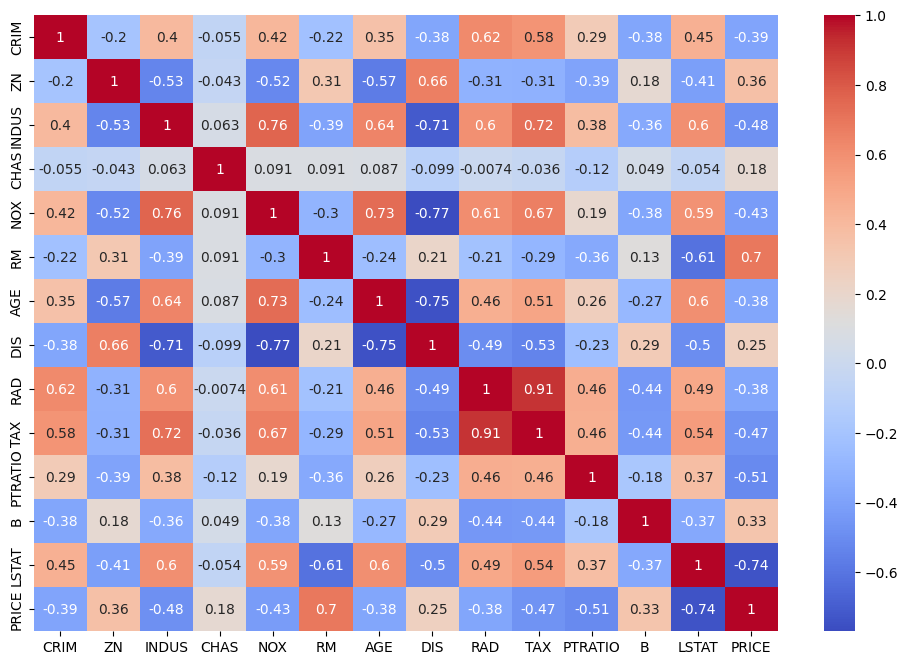

In [9]:
# heatmap

def heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()

heatmap(df)

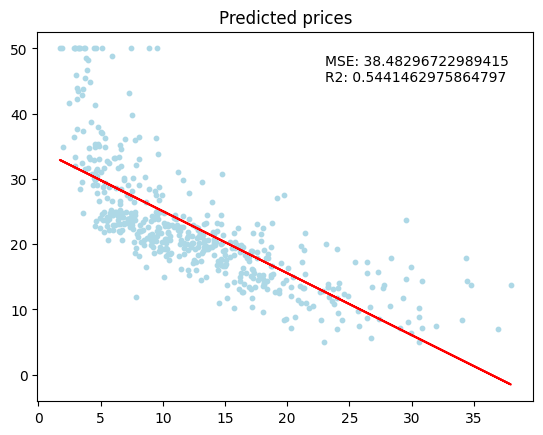

In [74]:
# simple linear regression with highest feature correlation

X = df[['LSTAT']]
Y = df["PRICE"]

regressor = LinearRegression()

regressor.fit(X , Y)

Y_pred = regressor.predict(X)

# plot MSE and R2

def plot_mse_r2(Y, Y_pred, X=None, degree=1):
    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)


    if X is not None:
        plt.plot(X, Y_pred, c="red")
        plt.scatter(X, Y, color="lightblue", s=10)
    plt.title("Predicted prices")
    if(degree > 1): plt.title(f"Predicted prices - Degree {degree}")
    plt.text(23, 45, f"MSE: {mse}\nR2: {r2}")
    plt.show()

plot_mse_r2(Y, Y_pred, X=X)

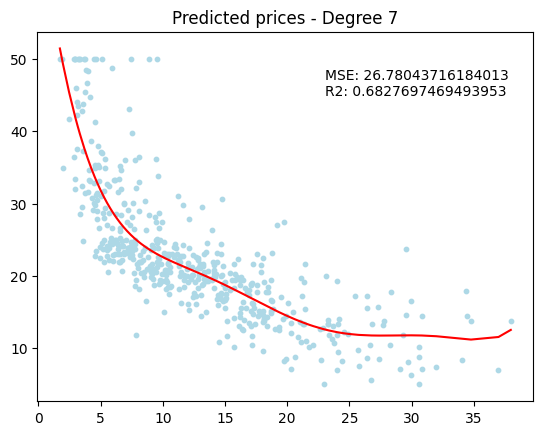

In [92]:
# polinomial regression with graph

def polinomial_regression(X, Y, degree=5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    regressor.fit(X_poly, Y)

    Y_pred = regressor.predict(X_poly)

    # sort X and Y_pred
    sorted_indices = np.argsort(X.flatten())
    X_sorted = X.flatten()[sorted_indices]
    Y_pred_sorted = Y_pred[sorted_indices]


    plt.plot(X_sorted, Y_pred_sorted, c="red")
    plt.scatter(X, Y, color="lightblue", s=10)
    plt.title(f"Predicted prices - Degree {degree}")
    plt.text(23, 45, f"MSE: {mean_squared_error(Y, Y_pred)}\nR2: {r2_score(Y, Y_pred)}")
    plt.show()

X = df[['LSTAT']].values
Y = df["PRICE"].values

polinomial_regression(X, Y, degree=7)

In [55]:
# multiple linear regression with the two most correlated features to target

X = df[['LSTAT', 'RM']]
Y = df["PRICE"]

regressor.fit(X , Y)

Y_pred = regressor.predict(X)

In [56]:
# polinomial regression with the three most correlated features

X_cols = df[["LSTAT", "RM", "PTRATIO"]]
Y = df["PRICE"]

degrees = [2, 3, 4, 5]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    X = poly.fit_transform(X_cols)

    regressor.fit(X, Y)

    Y_pred = regressor.predict(X)

In [57]:
# polinomial regression without bias

X_cols = df[["LSTAT", "RM", "PTRATIO"]]
Y = df["PRICE"]

degrees = [2, 3, 4, 5]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    X = poly.fit_transform(X_cols)

    regressor.fit(X, Y)

    Y_pred = regressor.predict(X)

In [58]:
# linear regression with all features

X = df.drop("PRICE", axis=1)
Y = df["PRICE"]

regressor.fit(X, Y)

Y_pred = regressor.predict(X)

In [59]:
#normalization

X_cols = df.drop("PRICE", axis=1)
Y = df["PRICE"]

X = (X_cols - X_cols.min()) / (X_cols.max() - X_cols.min())

regressor.fit(X, Y)

y_pred = regressor.predict(X)

In [60]:
# data standardization

X_cols = df.drop("PRICE", axis=1)
Y = df["PRICE"]

scaler = StandardScaler()

X = scaler.fit_transform(X_cols)

regressor.fit(X, Y)

Y_pred = regressor.predict(X)

In [61]:
# some predictions!

X_pred = pd.read_csv("../sample_data/housing_predict.csv")

X = X_pred.drop("OWNER", axis=1)

X = scaler.transform(X)

Y_pred = regressor.predict(X)

Y_pred

array([22.14633467, 25.11948741, 20.54343769, 26.91105226, 30.36557584])

In [62]:
# save results to excel

to_save = pd.DataFrame()

to_save["OWNER"] = X_pred["OWNER"]
to_save["PRICE"] = Y_pred

to_save.to_excel("housing_predictions.xlsx", index=False)